This dataset was generated using HRSC nadir panchromatic image h0905_0000 taken by the Mars Express spacecraft. The images is located in the Xanthe Terra, centered on Nanedi Vallis and covers mostly Noachian terrain on Mars. The image had a resolution of 12.5 meters/pixel.

## Problem statement
Determine if the instance is a crater or not a crater. 1=Crater, 0=Not Crater

## About the dataset
Using the technique described by L. Bandeira (Bandeira, Ding, Stepinski. 2010.Automatic Detection of Sub-km Craters Using Shape and Texture Information) we identify crater candidates in the image using the pipeline depicted in the figure below. Each crater candidate image block is normalized to a standard scale of 48 pixels. Each of the nine kinds of image masks probes the normalized image block in four different scales of 12 pixels, 24 pixels, 36 pixels, and 48 pixels, with a step of a third of the mask size (meaning 2/3 overlap). We totally extract 1,090 Haar-like attributes using nine types of masks as the attribute vectors to represent each crater candidate. The dataset was converted to the Weka ARFF format by Joseph Paul Cohen in 2012.

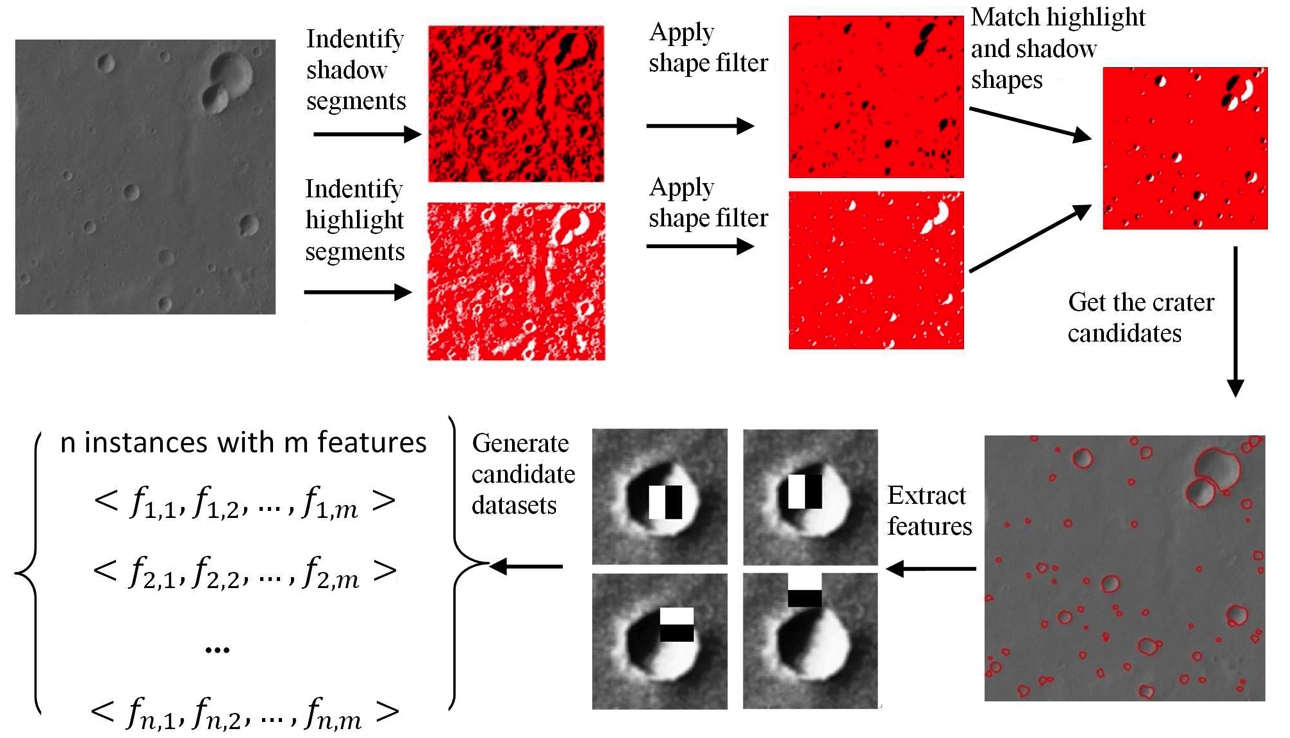

## Attribute Information:
We construct a attribute vector for each crater candidate using Haar-like attributes described by Papageorgiou 1998. These attributes are simple texture attributes which are calculated using Haar-like image masks that were used by Viola in 2004 for face detection consisting only black and white sectors. The value of an attribute is the difference between the sum of gray pixel values located within the black sector and the white sector of an image mask. The figure below shows nine image masks used in our case study. The first five masks focus on capturing diagonal texture gradient changes while the remaining four masks on horizontal or vertical textures.

## How to read an image ?
Python supports very powerful tools when comes to image processing.Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. It was introduced by John Hunter in the year 2002. We will use Matplotlib library to convert the image to numpy as array.

We import image from the Matplotlib library as mpimg.

Use mpimg.imread to read the image as numpy as array.

import matplotlib.image as mpimg
<div class="w-percent-100 flex-hbox flex-cross-center flex-main-center">
          <div style="width:100%" class="flex-auto">
            <div style="width:100%; max-width:100%; overflow: hidden "><p><img src="https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b-43/9301164e-92b3-4f64-b699-737433839cd8/file.png" alt="tile" /></p></div>
          </div>
        </div>

image = mpimg.imread('crater1.png')

##double click to get the source code

array([[0.40784314, 0.40784314, 0.40784314, ..., 0.42745098, 0.42745098,
        0.42745098],
       [0.4117647 , 0.4117647 , 0.4117647 , ..., 0.42745098, 0.42745098,
        0.42745098],
       [0.41960785, 0.41568628, 0.41568628, ..., 0.43137255, 0.43137255,
        0.43137255],
       ...,
       [0.4392157 , 0.43529412, 0.43137255, ..., 0.45490196, 0.4509804 ,
        0.4509804 ],
       [0.44313726, 0.44313726, 0.4392157 , ..., 0.4509804 , 0.44705883,
        0.44705883],
       [0.44313726, 0.4509804 , 0.4509804 , ..., 0.44705883, 0.44705883,
        0.44313726]], dtype=float32)
        
The image is converted in array


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

path = '/Users/herambdharmadhikari/OneDrive - stevens.edu/Mars_image_data.csv'

In [2]:
# Load dataset using pandas read_csv api in variable df
df = pd.read_csv(path)
# Dispay first 5 columns
df.head(5)

,Unnamed: 0,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,...,attr1080,attr1081,attr1082,attr1083,attr1084,attr1085,attr1086,attr1087,attr1088,attr1089
0,0,-4.049514,-5.055907,4.813832,10.975995,10.599993,8.103339,7.260105,3.984216,-3.352366,...,39.055706,39.480231,48.177327,49.460693,50.797614,50.680413,44.778675,36.101397,44.447948,0
1,1,3.514292,4.721218,-2.536391,-8.388817,-10.787064,-9.024258,-5.473323,7.646837,15.297336,...,34.934308,34.224270,42.633077,46.226847,49.730228,49.624121,45.398516,39.585452,45.971939,0
2,2,-11.318180,9.405884,29.141795,21.277405,-5.122294,-21.736671,-12.850864,3.134460,7.207608,...,86.905997,78.811334,84.165826,86.976997,116.149402,107.729029,96.534329,80.428859,114.810516,0
3,3,-7.143218,-9.869755,-7.905797,4.271652,22.890720,28.454973,12.167586,-2.024773,-2.093635,...,65.272842,63.522759,67.886176,67.388943,93.066755,91.394297,70.704254,63.252282,82.057148,0
4,4,-5.027305,5.600857,10.312207,3.855865,-1.988057,4.749132,9.700589,1.991069,-2.491197,...,80.313460,77.703464,93.575195,104.748562,129.462818,124.996294,118.110321,108.709732,139.685624,0


In [3]:
## As we can observe we have total 1088 independent variables and attr1089 is the dependent variable lets split them
X = df.drop(columns='attr1089')
y = df['attr1089']

In [4]:
## Lets split the data for Train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

## Intializing minmax Scaler
scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_test[45,5])

0.4646647584547681


## Predict the values after building a Machine learning model.
Instantiate the Logistic regression model in a variable lr

Fit the model on the training data X_train and y_train

Store the predicted values based on X_test in a variable called y_pred

Check the rocaucscore and store in the variable roc_score and print the same.

In [7]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [8]:
lr = LogisticRegression(max_iter=1500)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = lr.predict(X_test)

In [10]:
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.834042610697639


## Decision Tree

Intialize the Decision Tree model and store it in a variable dt.Use random_state=4

Fit the model on the training data X_train and y_train

Store the predicted values based on X_test in a variable called y_pred

Check the rocaucscore and store in the variable roc_score. Print the same.

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [12]:
y_pred = dt.predict(X_test)
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.8732834218291986


## Can we improve our model's performance with Random forrest algorithm?

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(random_state=4)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.9331657604133138


## Bagginng or Bootstrap aggregation

In [15]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=100,random_state=0)

In [16]:
bagging_clf.fit(X_train,y_train)
score_bagging = bagging_clf.score(X_test,y_test)
print(score_bagging)

0.832579185520362


## Voting Classifier

In [20]:
from sklearn.ensemble import VotingClassifier
clf_1 = LogisticRegression(max_iter=1500)
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)
model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

In [21]:
voting_clf_hard = VotingClassifier(estimators=model_list,voting='hard')

In [23]:
voting_clf_hard.fit(X_train,y_train)
hard_voting_score = voting_clf_hard.score(X_test,y_test)
print(hard_voting_score)

0.9221719457013575
